In [28]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data
dataset = pd.read_csv("li-ion_batteries_cycling_stats+metadata_aggregated.csv")
dataset.head(10)

,Internal_index,Cell_ID,Anode,Cathode,Source,Ah,Form_factor,Temperature,Max_SOC,Min_SOC,...,Min_voltage,Max_voltage,Charge_capacity,Charge_capacity_ratio,Discharge_capacity,Discharge_capacity_ratio,Charge_energy,Charge_energy_ratio,Discharge_energy,Discharge_energy_ratio
0,0,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20000,1.26800,0.788644,1.26900,0.788022,5.07300,0.197122,4.72500,0.211640
1,1,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20000,1.26800,1.000000,1.26900,1.000000,5.07100,1.000000,4.73000,1.000000
2,2,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20095,1.25355,0.988604,1.25335,0.987667,5.01130,0.988227,4.66770,0.986829
3,3,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20180,1.25905,0.992942,1.26040,0.993223,5.03610,0.993118,4.69795,0.993224
4,4,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20145,1.25475,0.989550,1.25450,0.988574,5.01225,0.988415,4.67840,0.989091
5,5,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20150,1.24335,0.980560,1.24330,0.979748,4.97130,0.980339,4.63185,0.979249
6,6,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.71805,4.20100,1.22085,0.962815,1.22085,0.962057,4.88455,0.963232,4.55270,0.962516
7,7,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20005,1.24165,0.979219,1.24175,0.978526,4.96865,0.979817,4.62610,0.978034
8,8,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.71995,4.15105,1.16295,0.917153,1.16690,0.919543,4.65395,0.917758,4.34460,0.918520
9,9,CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a,graphite,LCO,calce,1.35,prismatic,25,100.0,0.0,...,2.69900,4.20135,1.22670,0.967429,1.22645,0.966470,4.90625,0.967511,4.56795,0.965740


In [29]:
dataset.dtypes

Internal_index                int64
Cell_ID                      object
Anode                        object
Cathode                      object
Source                       object
Ah                          float64
Form_factor                  object
Temperature                   int64
Max_SOC                     float64
Min_SOC                     float64
Charge_rate                 float64
Discharge_rate              float64
Cycle                         int64
Cycle_time                  float64
Min_current                 float64
Max_current                 float64
Min_voltage                 float64
Max_voltage                 float64
Charge_capacity             float64
Charge_capacity_ratio       float64
Discharge_capacity          float64
Discharge_capacity_ratio    float64
Charge_energy               float64
Charge_energy_ratio         float64
Discharge_energy            float64
Discharge_energy_ratio      float64
dtype: object

In [30]:
dataset.drop(columns=['Internal_index','Cell_ID','Source'],inplace=True)

In [31]:
dataset=pd.get_dummies(dataset,columns=['Anode','Cathode','Form_factor'])

In [32]:
dataset.head()

,Ah,Temperature,Max_SOC,Min_SOC,Charge_rate,Discharge_rate,Cycle,Cycle_time,Min_current,Max_current,...,Discharge_energy_ratio,Anode_graphite,Cathode_LCO,Cathode_LFP,Cathode_NCA,Cathode_NMC,Cathode_NMC-LCO,Form_factor_18650,Form_factor_pouch,Form_factor_prismatic
0,1.35,25,100.0,0.0,0.5,0.5,0,28594.592,-0.55000,1.27500,...,0.211640,1,1,0,0,0,0,0,0,1
1,1.35,25,100.0,0.0,0.5,0.5,1,17680.531,-0.55100,1.29300,...,1.000000,1,1,0,0,0,0,0,0,1
2,1.35,25,100.0,0.0,0.5,0.5,21,17558.992,-0.55785,1.25565,...,0.986829,1,1,0,0,0,0,0,0,1
3,1.35,25,100.0,0.0,0.5,0.5,41,17511.676,-0.55000,1.29460,...,0.993224,1,1,0,0,0,0,0,0,1
4,1.35,25,100.0,0.0,0.5,0.5,61,17508.048,-0.55110,1.26530,...,0.989091,1,1,0,0,0,0,0,0,1


<AxesSubplot: >

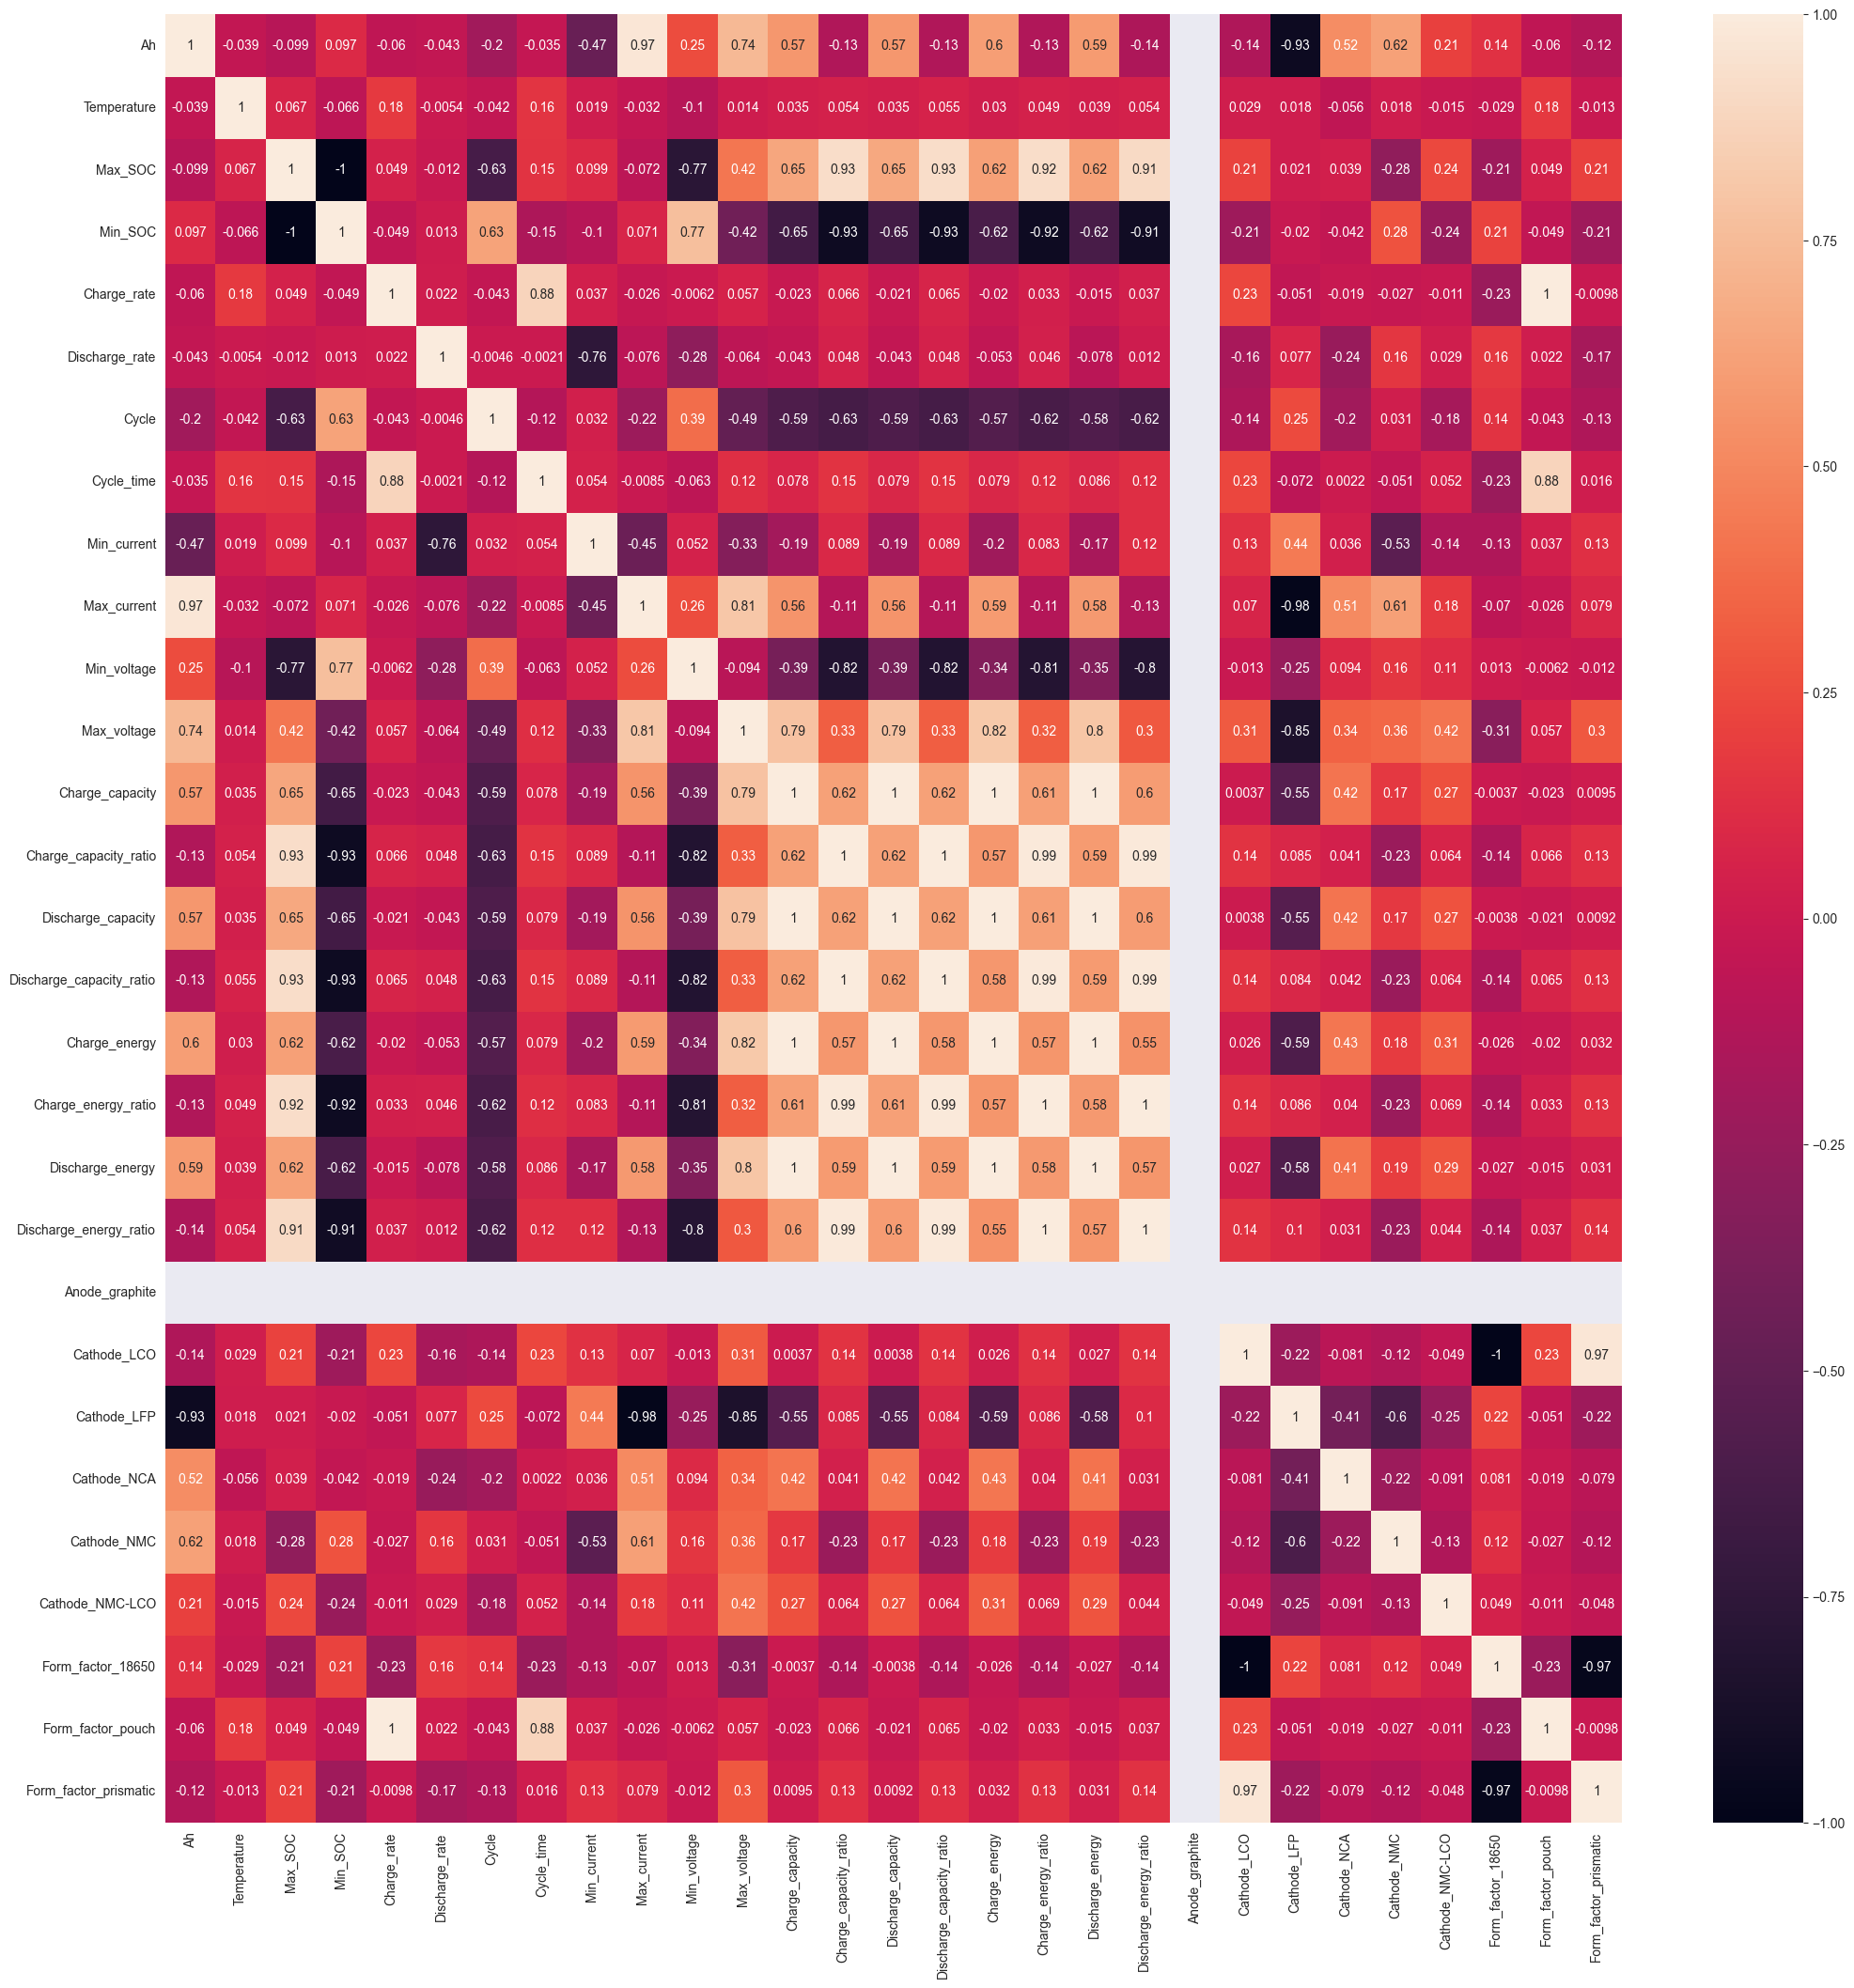

In [33]:
c=dataset.corr()
plt.figure(figsize = (25,25))
sns.heatmap(c, annot=True)

In [34]:
print(dataset.corr()['Charge_capacity_ratio'].sort_values (ascending=False))

Charge_capacity_ratio       1.000000
Discharge_capacity_ratio    0.999520
Charge_energy_ratio         0.991039
Discharge_energy_ratio      0.989335
Max_SOC                     0.928746
Charge_capacity             0.622809
Discharge_capacity          0.622778
Discharge_energy            0.590267
Charge_energy               0.574404
Max_voltage                 0.325945
Cycle_time                  0.147927
Cathode_LCO                 0.143473
Form_factor_prismatic       0.131220
Min_current                 0.089405
Cathode_LFP                 0.085019
Charge_rate                 0.065744
Form_factor_pouch           0.065744
Cathode_NMC-LCO             0.064190
Temperature                 0.054111
Discharge_rate              0.047896
Cathode_NCA                 0.040875
Max_current                -0.112342
Ah                         -0.129077
Form_factor_18650          -0.143473
Cathode_NMC                -0.231366
Cycle                      -0.633566
Min_voltage                -0.818733
M

In [35]:
dataset.drop(columns=['Discharge_capacity_ratio',
                      'Discharge_energy_ratio',
                      'Charge_energy_ratio',
                      'Max_SOC',
                      'Charge_capacity',
                      'Discharge_capacity',
                      'Discharge_energy',
                      'Charge_energy',
                      'Charge_rate',
                      'Temperature',
                      'Discharge_rate',
                      'Cycle',
                      'Min_SOC',
                      'Min_voltage',
                      'Anode_graphite',
                      'Cathode_NCA','Form_factor_pouch','Cathode_NMC-LCO'], inplace=True)


In [36]:
X = dataset.copy()
y = X.pop("Charge_capacity_ratio")
from sklearn.model_selection import GridSearchCV
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 123)


gsc = GridSearchCV(
    estimator=xg.XGBRegressor(),
    param_grid={"learning_rate": (0.05, 0.10, 0.15),
                "max_depth": [ 3, 4, 5, 6, 8],
                "min_child_weight": [ 1, 3, 5, 7],
                "gamma":[ 0.0, 0.1, 0.2],
                "colsample_bytree":[ 0.3, 0.4],},
    cv=3)


fit=gsc.fit(train_X, train_y)

pred = gsc.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


RMSE :  0.037122


In [37]:
print(fit.best_params_)

{'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3}
